In [245]:
# library here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PowerTransformer
import re

In [246]:
# read csv file
df = pd.read_csv("/content/SimplyHired_webscraping_data_scientist_3_14.csv")
df.head()

,company_name,title,location,summary,salary,star,work_style,benefit,qualification,full description
0,Subcodevs,Data Scientist,United States,"In this role, you will collaborate with cross-...",$15.02 - $20.84 an hour,NaN,Full-time | Contract,NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...
1,Louis Vuitton,JUNIOR DATA SCIENTIST,"New York, NY",The succesful candidate will be recognized for...,"$100,000 - $115,000 a year",3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...
2,Outlier Ai,Data Scientist - AI Trainer,Remote,About the opportunity: Outlier is looking for ...,$22 - $50 an hour,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...
3,Motus Recruiting and Staffing,Data Scientist (Remote),"Portland, OR",Assist developing reports in Workday and other...,$48 an hour,3.0,Full-time | Contract,"Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g..."
4,Vanderbilt University Medical Center,Data Scientist Associate,"Nashville, TN",Guides and educates data science teams to prov...,NaN,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...


In [247]:
# check info of dataset before preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      1265 non-null   object 
 1   title             1265 non-null   object 
 2   location          1265 non-null   object 
 3   summary           1265 non-null   object 
 4   salary            829 non-null    object 
 5   star              1094 non-null   float64
 6   work_style        986 non-null    object 
 7   benefit           700 non-null    object 
 8   qualification     1265 non-null   object 
 9   full description  1265 non-null   object 
dtypes: float64(1), object(9)
memory usage: 99.0+ KB


In [248]:
# after fill all null values
# Step 1: Group by all columns and count the occurrences
df['duplicate count'] = df.groupby(df.columns.tolist(), dropna=False).transform('size')

# Display the updated DataFrame
df

,company_name,title,location,summary,salary,star,work_style,benefit,qualification,full description,duplicate count
0,Subcodevs,Data Scientist,United States,"In this role, you will collaborate with cross-...",$15.02 - $20.84 an hour,NaN,Full-time | Contract,NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1
1,Louis Vuitton,JUNIOR DATA SCIENTIST,"New York, NY",The succesful candidate will be recognized for...,"$100,000 - $115,000 a year",3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1
2,Outlier Ai,Data Scientist - AI Trainer,Remote,About the opportunity: Outlier is looking for ...,$22 - $50 an hour,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1
3,Motus Recruiting and Staffing,Data Scientist (Remote),"Portland, OR",Assist developing reports in Workday and other...,$48 an hour,3.0,Full-time | Contract,"Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7
4,Vanderbilt University Medical Center,Data Scientist Associate,"Nashville, TN",Guides and educates data science teams to prov...,NaN,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1
...,...,...,...,...,...,...,...,...,...,...,...
1260,Capital One,Senior Lead Machine Learning Engineer,"Richmond, VA",Master's or doctoral degree in computer scienc...,NaN,3.9,Full-time,NaN,"TensorFlow, CI/CD, Management, Doctoral degree...",Senior Lead Machine Learning Engineer\nAs a Ca...,11
1261,"MUFG Bank, Ltd.",Senior Artificial Intelligence Programmer - VP,"Tampa, FL",Bachelor's or Master's degree in Computer Scie...,"$145,000 - $182,000 a year",3.3,Full-time,"Paid parental leave, Paid holidays, Health ins...","TensorFlow, Azure, Computer Science, PyTorch, ...",Do you want your voice heard and your actions ...,2
1262,Capital One,"Manager, Information Security Office Consultan...","McLean, VA",At least 1 years of experience with architectu...,NaN,3.9,Full-time,NaN,"Penetration testing, Cloud infrastructure, Azu...","Manager, Information Security Office Consultan...",7
1263,Exact Sciences,Senior Machine Learning Engineer,"Madison, WI","Ph.D. in Statistics, Computational Biology, Co...","$109,000 - $174,000 a year",3.2,Full-time,"Paid parental leave, Health insurance, Dental ...","AI models, TensorFlow, Reinforcement learning,...","Help us change lives\nAt Exact Sciences, we’re...",5


In [249]:
# check the # of null and remove them
print(df.isna().sum())
df = df.drop_duplicates().reset_index(drop=True)
df

company_name          0
title                 0
location              0
summary               0
salary              436
star                171
work_style          279
benefit             565
qualification         0
full description      0
duplicate count       0
dtype: int64


,company_name,title,location,summary,salary,star,work_style,benefit,qualification,full description,duplicate count
0,Subcodevs,Data Scientist,United States,"In this role, you will collaborate with cross-...",$15.02 - $20.84 an hour,NaN,Full-time | Contract,NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1
1,Louis Vuitton,JUNIOR DATA SCIENTIST,"New York, NY",The succesful candidate will be recognized for...,"$100,000 - $115,000 a year",3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1
2,Outlier Ai,Data Scientist - AI Trainer,Remote,About the opportunity: Outlier is looking for ...,$22 - $50 an hour,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1
3,Motus Recruiting and Staffing,Data Scientist (Remote),"Portland, OR",Assist developing reports in Workday and other...,$48 an hour,3.0,Full-time | Contract,"Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7
4,Vanderbilt University Medical Center,Data Scientist Associate,"Nashville, TN",Guides and educates data science teams to prov...,NaN,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1
...,...,...,...,...,...,...,...,...,...,...,...
684,Leidos,Machine Learning Signal Processing Engineer,"Beavercreek, OH",Leverage state-of-the-art AI/ML tools and meth...,"$67,600 - $122,200 a year",3.7,Full-time,NaN,"Computer science, MATLAB, Signal processing, P...",Description\nDo you want to join a high perfor...,1
685,General Dynamics Information Technology,AI and LLM Architect,"Springfield, VA",Estimate cost of using LLMs in different forms...,"$181,050 - $244,950 a year",3.7,Full-time,"Paid jury duty, Health savings account, AD&D i...","Top Secret Clearance, Law, TS/SCI, Bachelor's ...",Type of Requisition:\nRegular\nClearance Level...,2
686,"MUFG Bank, Ltd.",Senior Artificial Intelligence Programmer - VP,"Tampa, FL",Bachelor's or Master's degree in Computer Scie...,"$145,000 - $182,000 a year",3.3,Full-time,"Paid parental leave, Paid holidays, Health ins...","TensorFlow, Azure, Computer Science, PyTorch, ...",Do you want your voice heard and your actions ...,2
687,Motion Recruitment,Machine Learning / Senior Engineer (Culver),"Los Angeles, CA",With a focus on ensuring responsible and trans...,"$230,000 - $250,000 a year",3.8,Full-time,NaN,"7 years, Software deployment, Data structures,...",We are a trailblazing global technology compan...,1


## company name

In [250]:
# do nothing for now

## title

In [251]:
# do nothing for now

## location

In [252]:
# split locatoin column into city & state
df[["city", "state"]] = df["location"].str.split(",", expand=True)
df.loc[df["city"]=="Remote", "state"] = "Remote"
df.loc[df["city"]=="United States", "state"] = "United States"
df.drop(columns=["location"], inplace=True)
df.head()

,company_name,title,summary,salary,star,work_style,benefit,qualification,full description,duplicate count,city,state
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",$15.02 - $20.84 an hour,NaN,Full-time | Contract,NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,"$100,000 - $115,000 a year",3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,$22 - $50 an hour,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,$48 an hour,3.0,Full-time | Contract,"Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,NaN,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN


## summary

In [253]:
# do nothing for now

## salary

In [254]:
# function to unify the unit
def adjust_salary(x):
    if pd.notna(x): # Not null
        if x < 1000: # /hour
            return x * 1767
        elif x < 30000: # /month
            return x * 12
        else: # /year
            return x
    return x

In [255]:
# split salary into min & max
df["salary"] = df["salary"].str.replace("From ", "")
df["salary"] = df["salary"].str.replace("$", "")
df["salary"] = df["salary"].str.replace(",", "")
df["salary"] = df["salary"].str.replace("an hour", "")
df["salary"] = df["salary"].str.replace("a year", "")
df["salary"] = df["salary"].str.replace("Up to ", "")
df["salary"] = df["salary"].str.replace("a month", "")
df[["min salary", "max salary"]] = df["salary"].str.split("-", expand=True)

# conver to numeric
df["min salary"] = pd.to_numeric(df["min salary"])
df["max salary"] = pd.to_numeric(df["max salary"])

# apply function
df["min salary"] = df["min salary"].apply(adjust_salary)  # from a survey, people in the us work for 1767 hours in a year
df["max salary"] = df["max salary"].apply(adjust_salary) # from a survey, people in the us work for 1767 hours in a year

# if max salary does not exist
df["max salary"].fillna(df["min salary"], inplace=True)

# remove salary column
df.drop(columns=["salary"], axis=1, inplace=True)
df

<ipython-input-255-41a1308d408d>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max salary"].fillna(df["min salary"], inplace=True)


,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",NaN,Full-time | Contract,NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,Full-time | Contract,"Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Leidos,Machine Learning Signal Processing Engineer,Leverage state-of-the-art AI/ML tools and meth...,3.7,Full-time,NaN,"Computer science, MATLAB, Signal processing, P...",Description\nDo you want to join a high perfor...,1,Beavercreek,OH,67600.00,122200.00
685,General Dynamics Information Technology,AI and LLM Architect,Estimate cost of using LLMs in different forms...,3.7,Full-time,"Paid jury duty, Health savings account, AD&D i...","Top Secret Clearance, Law, TS/SCI, Bachelor's ...",Type of Requisition:\nRegular\nClearance Level...,2,Springfield,VA,181050.00,244950.00
686,"MUFG Bank, Ltd.",Senior Artificial Intelligence Programmer - VP,Bachelor's or Master's degree in Computer Scie...,3.3,Full-time,"Paid parental leave, Paid holidays, Health ins...","TensorFlow, Azure, Computer Science, PyTorch, ...",Do you want your voice heard and your actions ...,2,Tampa,FL,145000.00,182000.00
687,Motion Recruitment,Machine Learning / Senior Engineer (Culver),With a focus on ensuring responsible and trans...,3.8,Full-time,NaN,"7 years, Software deployment, Data structures,...",We are a trailblazing global technology compan...,1,Los Angeles,CA,230000.00,250000.00


## work-style

In [256]:
# check unique values
df["work_style"].unique()

# replace "|" with ","
df["work_style"] = df["work_style"].str.replace("|", ",")

# delete space
df["work_style"] = df["work_style"].str.replace(" ", "")

## benefit

In [257]:
# do nothing for now

## qualification

In [258]:
# calculate the average of experience year
def calc_avg_exp_year(data):
  if pd.isna(data) or data == "":
    return 0

  years = re.findall(r"(\d+)\s*years?", data)
  if years:
    years = [int(year.split()[0]) for year in years]
    return np.mean(years)
  return 0

In [259]:
# unique_qualifications_set = set(df["qualification"])

# print(unique_qualifications_set)

# print(len(unique_qualifications_set))
unique_qualifications = set()
for row in df["qualification"]:
  qualifications = row.split(",")
  qualifications = [qualification.replace(" ", "") for qualification in qualifications]
  unique_qualifications.update(qualifications)

print(unique_qualifications)
print(len(unique_qualifications))

{'Assays', 'Django', 'POS', 'Statisticalmodeling', 'Productmanagement', 'B2B', 'Autoencoder', 'Electronicwarfare', 'ITservicemanagement', 'GitHub', 'VisualBasic', 'Logistics', 'Highavailability', 'ComputerApplications', 'SleepDisordersSpecialist', 'Pandas', 'MicrosoftOutlook', 'Industriallaboratoryexperience', 'Spark', 'Sentimentanalytics', 'Riskanalysis', 'LookerStudio', 'Projectmanagementmethodology', 'Aviation', 'Softwaredeployment', 'Powertools', 'Systemdesign', 'Flask', 'Projectmanagement', 'Keras', 'GIS', 'CSSLP', 'Bigdata', 'Databricks', 'GAAP', 'Dataanalytics', 'Computerskills', 'CCSP', 'Supplychainmanagement', 'GrammarExperience', 'Bamboo', 'Node.js', 'Scalability', 'Deeplearning', 'Signalsintelligence', 'GoogleAnalytics', 'Businessanalysis', 'MXNet', 'Go', 'Economics', 'Applicationdevelopment', 'Inventorymanagement', 'Torch', 'Pharmacyresidency', 'GSEC', 'Dataproductstrategy', 'Businessrequirements', 'NoSQL', 'VBA', 'Integratedmarketing', 'GPUprogramming', 'NursePractitioner(

In [260]:
# for education column
education_key = {
    "Master": "Master's degree",
    "Doctor": "Doctor's degree",
    "Bachelor": "Bachelor's degree",
    "High school": "High school diploma or GED",
    "GED": "High school diploma or GED",
    "Associate": "Associate's degree"
}

# for level column
level_key = [
    "Entry level", "Mid-level", "Senior level"
]

# for experience year column
experience_year_key = [
    "Under 1 year", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10 years", "11+ years", "1 year", "2 years", "3 years"
]

# for programming column
programming_languages_key = [
    "Python", "Java", "JavaScript", "C++", "Ruby", "C#", "PHP", "Swift", "Go",
    "Kotlin", "Rust", "TypeScript", "R", "SQL", "Perl", "Objective C", "MATLAB",
    "Scala", "Lua", "Shell Script", "Bash", "HTML", "CSS", "Dart", "VHDL", "ActionScript",
    "Elixir", "Haskell", "F#", "Visual Basic", "Groovy", "Delphi", "Object Pascal",
    "C", "Ada", "Fortran", "COBOL", "Smalltalk", "Prolog", "Lisp", "Tcl", "Chapel", "Zig",
    "Crystal", "Hack", "Nim", "OCaml", "Vala", "Erlang", "Ceylon", "Xojo", "Racket",
    "AutoHotkey", "XSLT", "Mercury", "Fantom", "Red", "Io", "Vyper", "Pike", "GAMS",
    "Rebol", "Eiffel", "Curl", "GLSL", "Simula", "ML", "Forth", "Modula-2", "Algol", "Haxe"
]

# assign all values in qualification to 4 columns
for idx, row in df.iterrows():
    ele = row["qualification"]
    # if the values are null
    if pd.isna(ele) or ele == "":
        df.at[idx, "education"] = np.nan
        df.at[idx, "experience_year"] = np.nan
        df.at[idx, "programming_language"] = np.nan
        df.at[idx, "other skill"] = np.nan
        continue

    # else
    edu_set = []
    for key, value in education_key.items():
      if key in ele:
        edu_set.append(value)
    level_set = [keyword for keyword in level_key if keyword in ele]
    experience_year_set = [keyword for keyword in experience_year_key if keyword in ele]
    prog_lang_set = [keyword for keyword in programming_languages_key if keyword in ele]

    # remaining values
    remaining_skills = [skill for skill in ele.split(',') if skill not in education_key and skill not in level_key and skill not in experience_year_key and skill not in programming_languages_key]

    # average experience year
    if experience_year_set:
      experience_year = ', '.join(experience_year_set)
      df.at[idx, "experience_year"] = calc_avg_exp_year(experience_year)

    df.at[idx, "education"] = ','.join(edu_set) if edu_set else np.nan
    # df.at[idx, "experience_year"] = ', '.join(experience_year_set) if experience_year_set else np.nan
    df.at[idx, "level"] = ','.join(level_set) if level_set else np.nan
    df.at[idx, "programming_language"] = ','.join(prog_lang_set) if prog_lang_set else np.nan
    df.at[idx, "other skill"] = ','.join(remaining_skills) if remaining_skills else np.nan


df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",NaN,"Full-time,Contract",NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ..."
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,NaN,NaN,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta..."
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,NaN,Bachelor's degree,Mid-level,NaN,"Mathematics, Mid-level, Math, Bachelor's degree"
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,NaN,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ..."
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,NaN,NaN,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le..."


## full description

In [261]:
# do nothing for now

## Combine with linkedIn and other ocuupation like data enginner, analyst

In [262]:
# couldn't combine, the num of rows is too small

## Handling Issues/Noise in the Data:

In [263]:
# fill null values
df["benefit"] = df["benefit"].fillna("")
df["work_style"] = df["work_style"].fillna("")
df["education"] = df["education"].fillna("")
df["experience_year"] = df["experience_year"].fillna(0)
df["programming_language"] = df["programming_language"].fillna("")
df["other skill"] = df["other skill"].fillna("")

In [264]:
# fill null values in city and state columns
df["city"] = df["city"].fillna("Unknown")
df["state"] = df["state"].fillna("Unknown")

# average min/max salary depending on city
avg_min_salary_per_city = df.groupby("city")["min salary"].median()
avg_max_salary_per_city = df.groupby("city")["max salary"].median()
# median of star
freq_star = df["star"].median()

# median of min/max salary
med_min_salary = df["min salary"].median()
med_max_salary = df["max salary"].median()

# fill the null values in avg_min/max_salary_per_city
avg_min_salary_per_city = avg_min_salary_per_city.fillna(med_min_salary)
avg_max_salary_per_city = avg_max_salary_per_city.fillna(med_max_salary)

# fill the null values in min/max salary
df["min salary"] = df["min salary"].fillna(df["city"].map(avg_min_salary_per_city))
df["max salary"] = df["max salary"].fillna(df["city"].map(avg_max_salary_per_city))

# fill the null values in star
df["star"] = df["star"].fillna(freq_star)

In [265]:
# check the avg_max_salary_per_city
avg_max_salary_per_city

,max salary
city,
Aberdeen,61845.0
Aberdeen Proving Ground,86000.0
Agoura Hills,140000.0
Albany,120612.0
Albuquerque,153536.0
...,...
Winchester,162850.0
Windsor Mill,216000.0
Woonsocket,222480.0


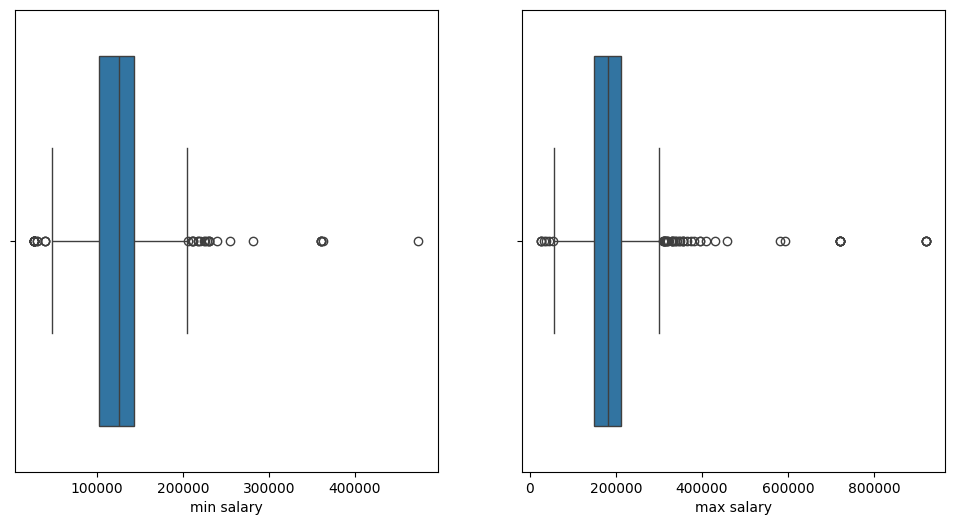

In [266]:
# check the outliers
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(x="min salary", data=df, ax=ax[0])
sns.boxplot(x="max salary", data=df, ax=ax[1])
plt.show()

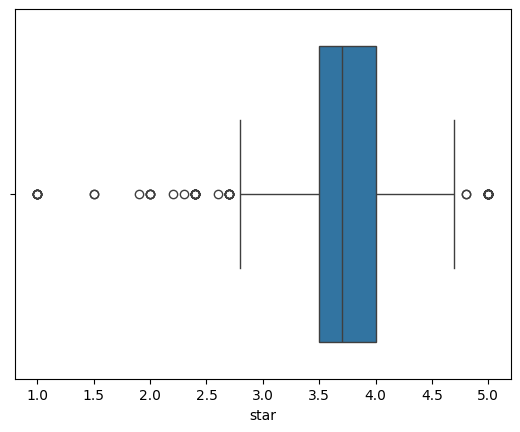

In [267]:
sns.boxplot(x="star", data=df)
plt.show()

In [268]:
# check info of dataset after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          689 non-null    object 
 1   title                 689 non-null    object 
 2   summary               689 non-null    object 
 3   star                  689 non-null    float64
 4   work_style            689 non-null    object 
 5   benefit               689 non-null    object 
 6   qualification         689 non-null    object 
 7   full description      689 non-null    object 
 8   duplicate count       689 non-null    int64  
 9   city                  689 non-null    object 
 10  state                 689 non-null    object 
 11  min salary            689 non-null    float64
 12  max salary            689 non-null    float64
 13  experience_year       689 non-null    float64
 14  education             689 non-null    object 
 15  level                 6

In [269]:
# check the # of null
df.isna().sum()

,0
company_name,0
title,0
summary,0
star,0
work_style,0
benefit,0
qualification,0
full description,0
duplicate count,0
city,0


In [270]:
# df.describe()

## Understanding the Data:

In [271]:
# check the dtypes
df.dtypes

,0
company_name,object
title,object
summary,object
star,float64
work_style,object
benefit,object
qualification,object
full description,object
duplicate count,int64
city,object


In [272]:
# only numeric values
df_numeric = df.select_dtypes(include=["float", "int"])
# df_numeric

#mean
print(df_numeric.mean())

#median
print(df_numeric.median())

#variance
print(df_numeric.var())

print(df_numeric.describe())

star                    3.679100
duplicate count         1.835994
min salary         126180.739122
max salary         195721.724586
experience_year         2.805757
dtype: float64
star                    3.7
duplicate count         1.0
min salary         125300.0
max salary         182300.0
experience_year         2.0
dtype: float64
star               3.154347e-01
duplicate count    2.596610e+00
min salary         2.014831e+09
max salary         1.112862e+10
experience_year    6.368747e+00
dtype: float64
             star  duplicate count     min salary     max salary  \
count  689.000000       689.000000     689.000000     689.000000   
mean     3.679100         1.835994  126180.739122  195721.724586   
std      0.561636         1.611400   44886.874180  105492.257128   
min      1.000000         1.000000   26505.000000   26505.000000   
25%      3.500000         1.000000  101640.000000  150000.000000   
50%      3.700000         1.000000  125300.000000  182300.000000   
75%      4.000

In [273]:
# only categorical values
df_categorical = df.select_dtypes(include=["object"])
df_categorical.describe()

,company_name,title,summary,work_style,benefit,qualification,full description,city,state,education,level,programming_language,other skill
count,689,689,689,689,689,689,689,689,689,689,689,689,689
unique,463,499,636,14,255,665,672,241,45,18,3,120,664
top,TikTok,Data Scientist,About the Opportunity: Join Outlier as a talen...,Full-time,,"Writing skills, English, Mid-level, Associate'...",Elevate AI Performance with Your Writing Exper...,Remote,CA,,Senior level,"Python,R,SQL,C","Writing skills, English, Mid-level, Associate'..."
freq,26,85,8,455,295,8,8,92,142,153,434,91,8


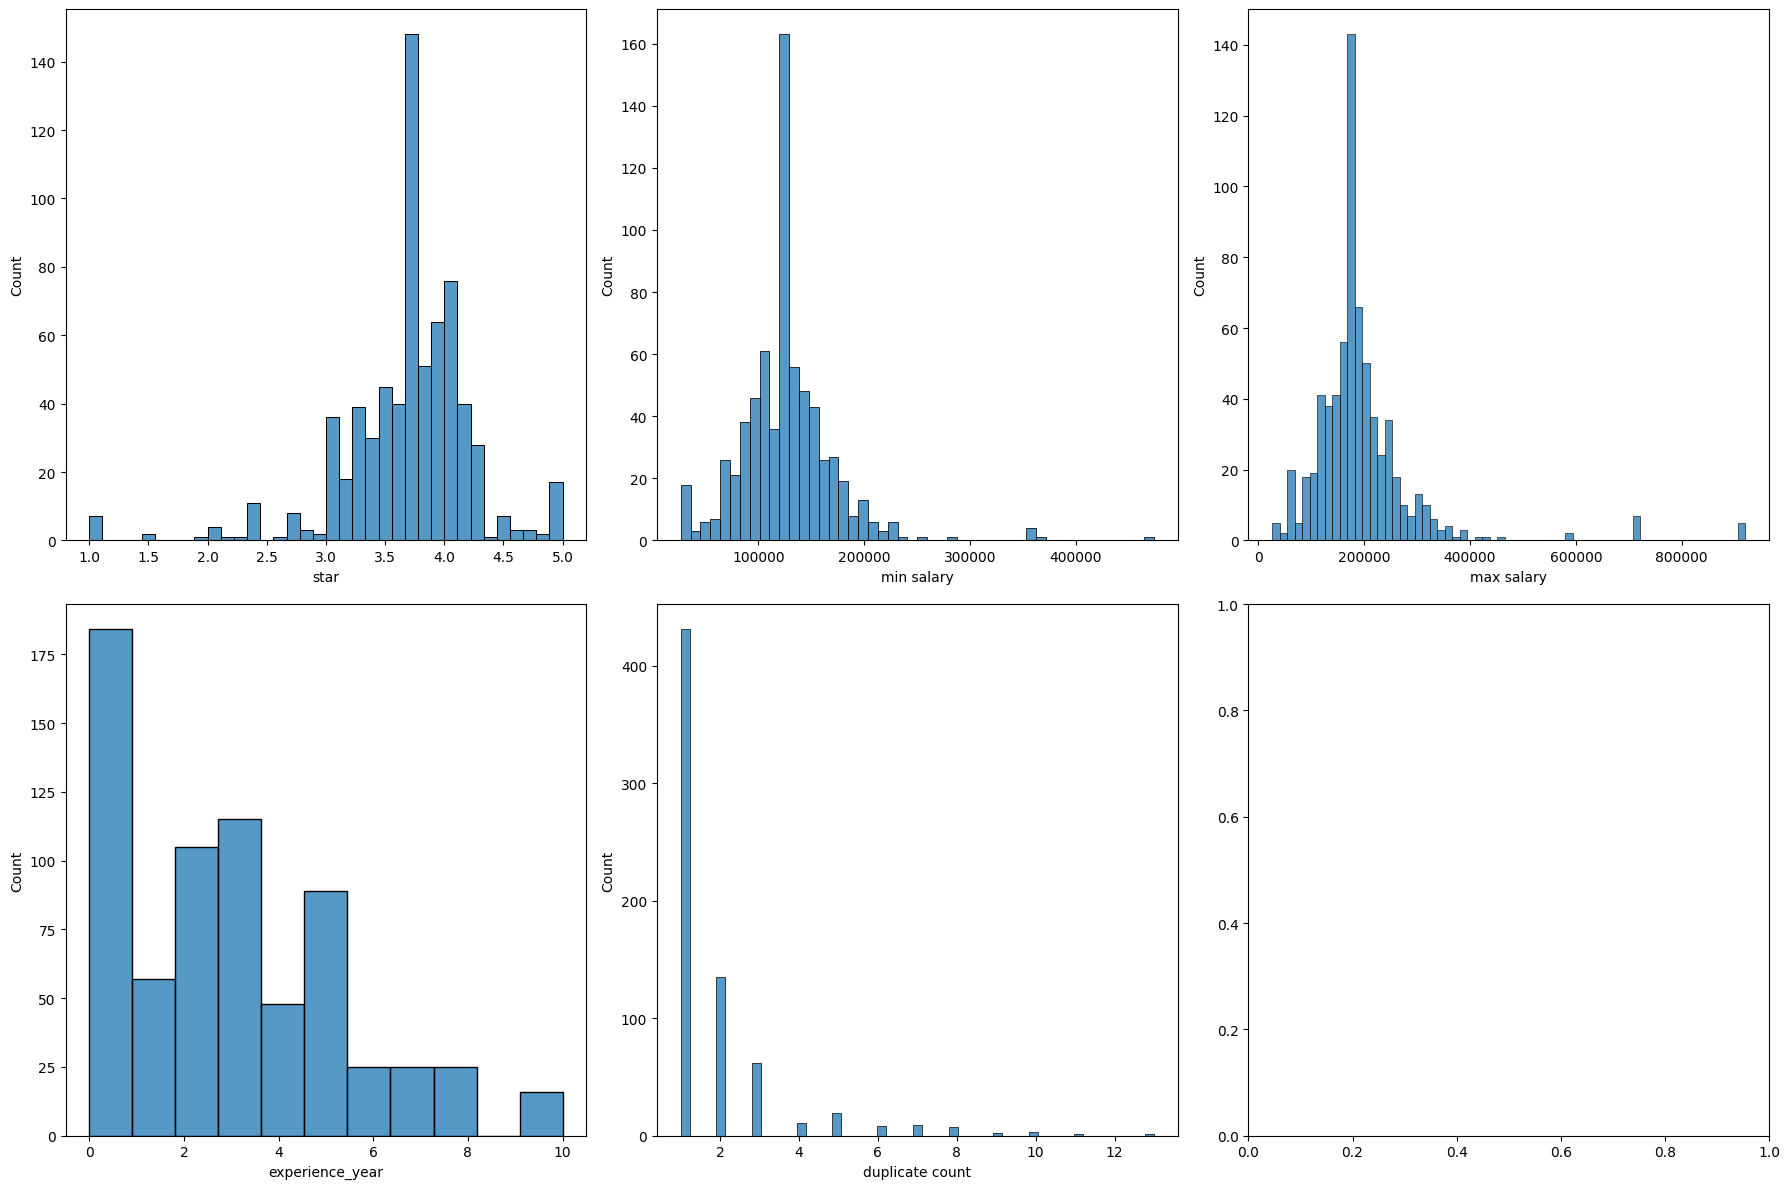

Skewness check: 
Star: -1.3633029489923862, Min Salary: 1.6916528398826587, Max Salary: 3.766381308080455, Experience Year: 0.7753063704402152, Duplicate Number: 2.9769859438204436


In [274]:
# check the skewness (take log?)
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(x="star", data=df_numeric, ax=ax[0,0]) # left skewed
sns.histplot(x="min salary", data=df_numeric, ax=ax[0,1]) # right skewed
sns.histplot(x="max salary", data=df_numeric, ax=ax[0,2]) # right skewed
sns.histplot(x="experience_year", data=df_numeric, ax=ax[1,0]) # right skewed
sns.histplot(x="duplicate count", data=df_numeric, ax=ax[1,1]) # right skewed

plt.tight_layout()
plt.show()

star_skew = df["star"].skew()
min_salary_skew = df["min salary"].skew()
max_salary_skew = df["max salary"].skew()
year_skew = df["experience_year"].skew()
duplicate_skew = df["duplicate count"].skew()

print(f"Skewness check: \nStar: {star_skew}, Min Salary: {min_salary_skew}, Max Salary: {max_salary_skew}, Experience Year: {year_skew}, Duplicate Number: {duplicate_skew}")
# star skew is less than -1, and min & max skew are greater than 1. So, we should apply log transformation

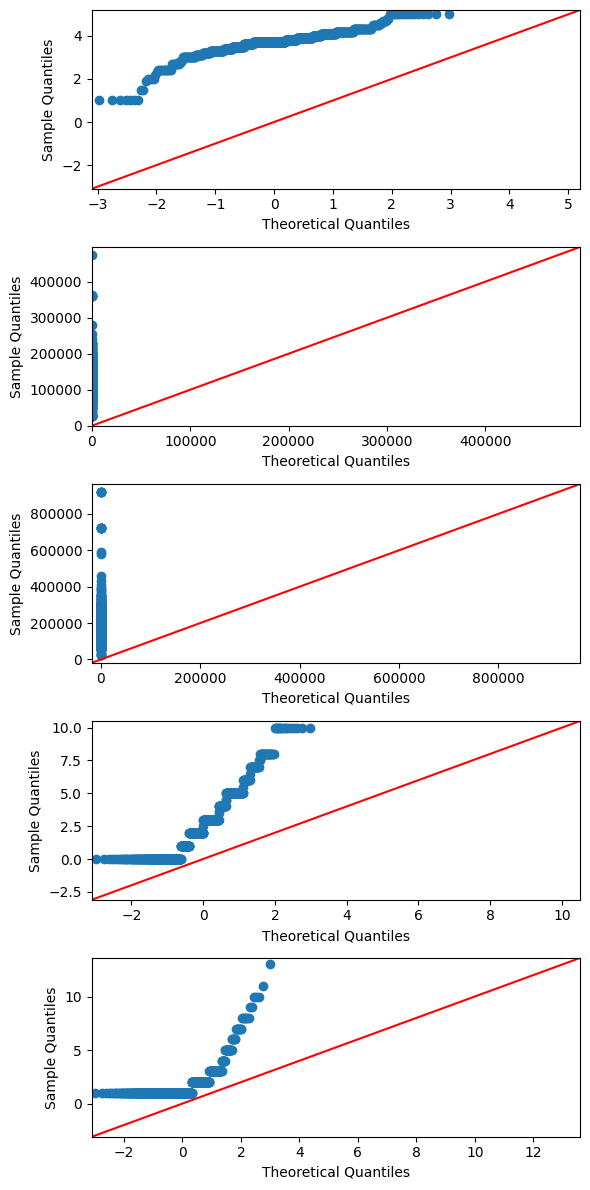

In [275]:
# QQ- plot
fig, ax = plt.subplots(5,1,figsize=(6,12))

sm.qqplot(df["star"], line="45", ax=ax[0])
sm.qqplot(df["min salary"], line="45", ax=ax[1])
sm.qqplot(df["max salary"], line="45", ax=ax[2])
sm.qqplot(df["experience_year"], line="45", ax=ax[3])
sm.qqplot(df["duplicate count"], line="45", ax=ax[4])

plt.tight_layout()
plt.show()


<Axes: >

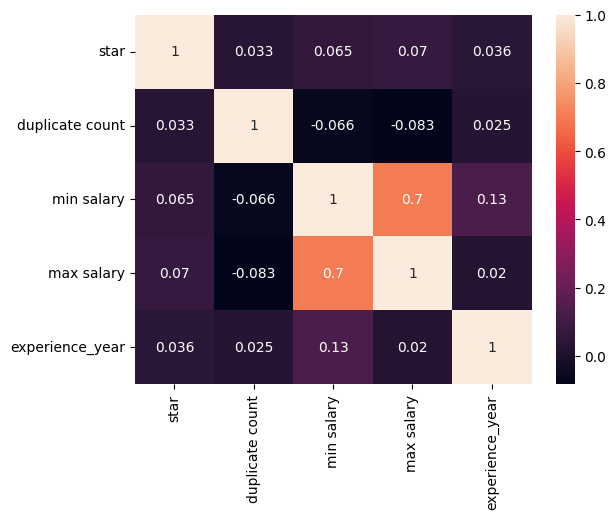

In [276]:
# check the correlation
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True)

## Data transformation for modeling (numeric columns)

In [277]:
numeric_columns = ["star", "min salary", "max salary", "experience_year", "duplicate count"]
transformed_columns = ["trans star", "trans min salary", "trans max salary", "trans experience_year", "trans duplicate count"]

# apply log transformation to star, min & max salary
log = PowerTransformer()
df[transformed_columns] = log.fit_transform(df[numeric_columns])

# apply standardization to star, min & max salary
scaler = StandardScaler()
df[transformed_columns] = scaler.fit_transform(df[numeric_columns])

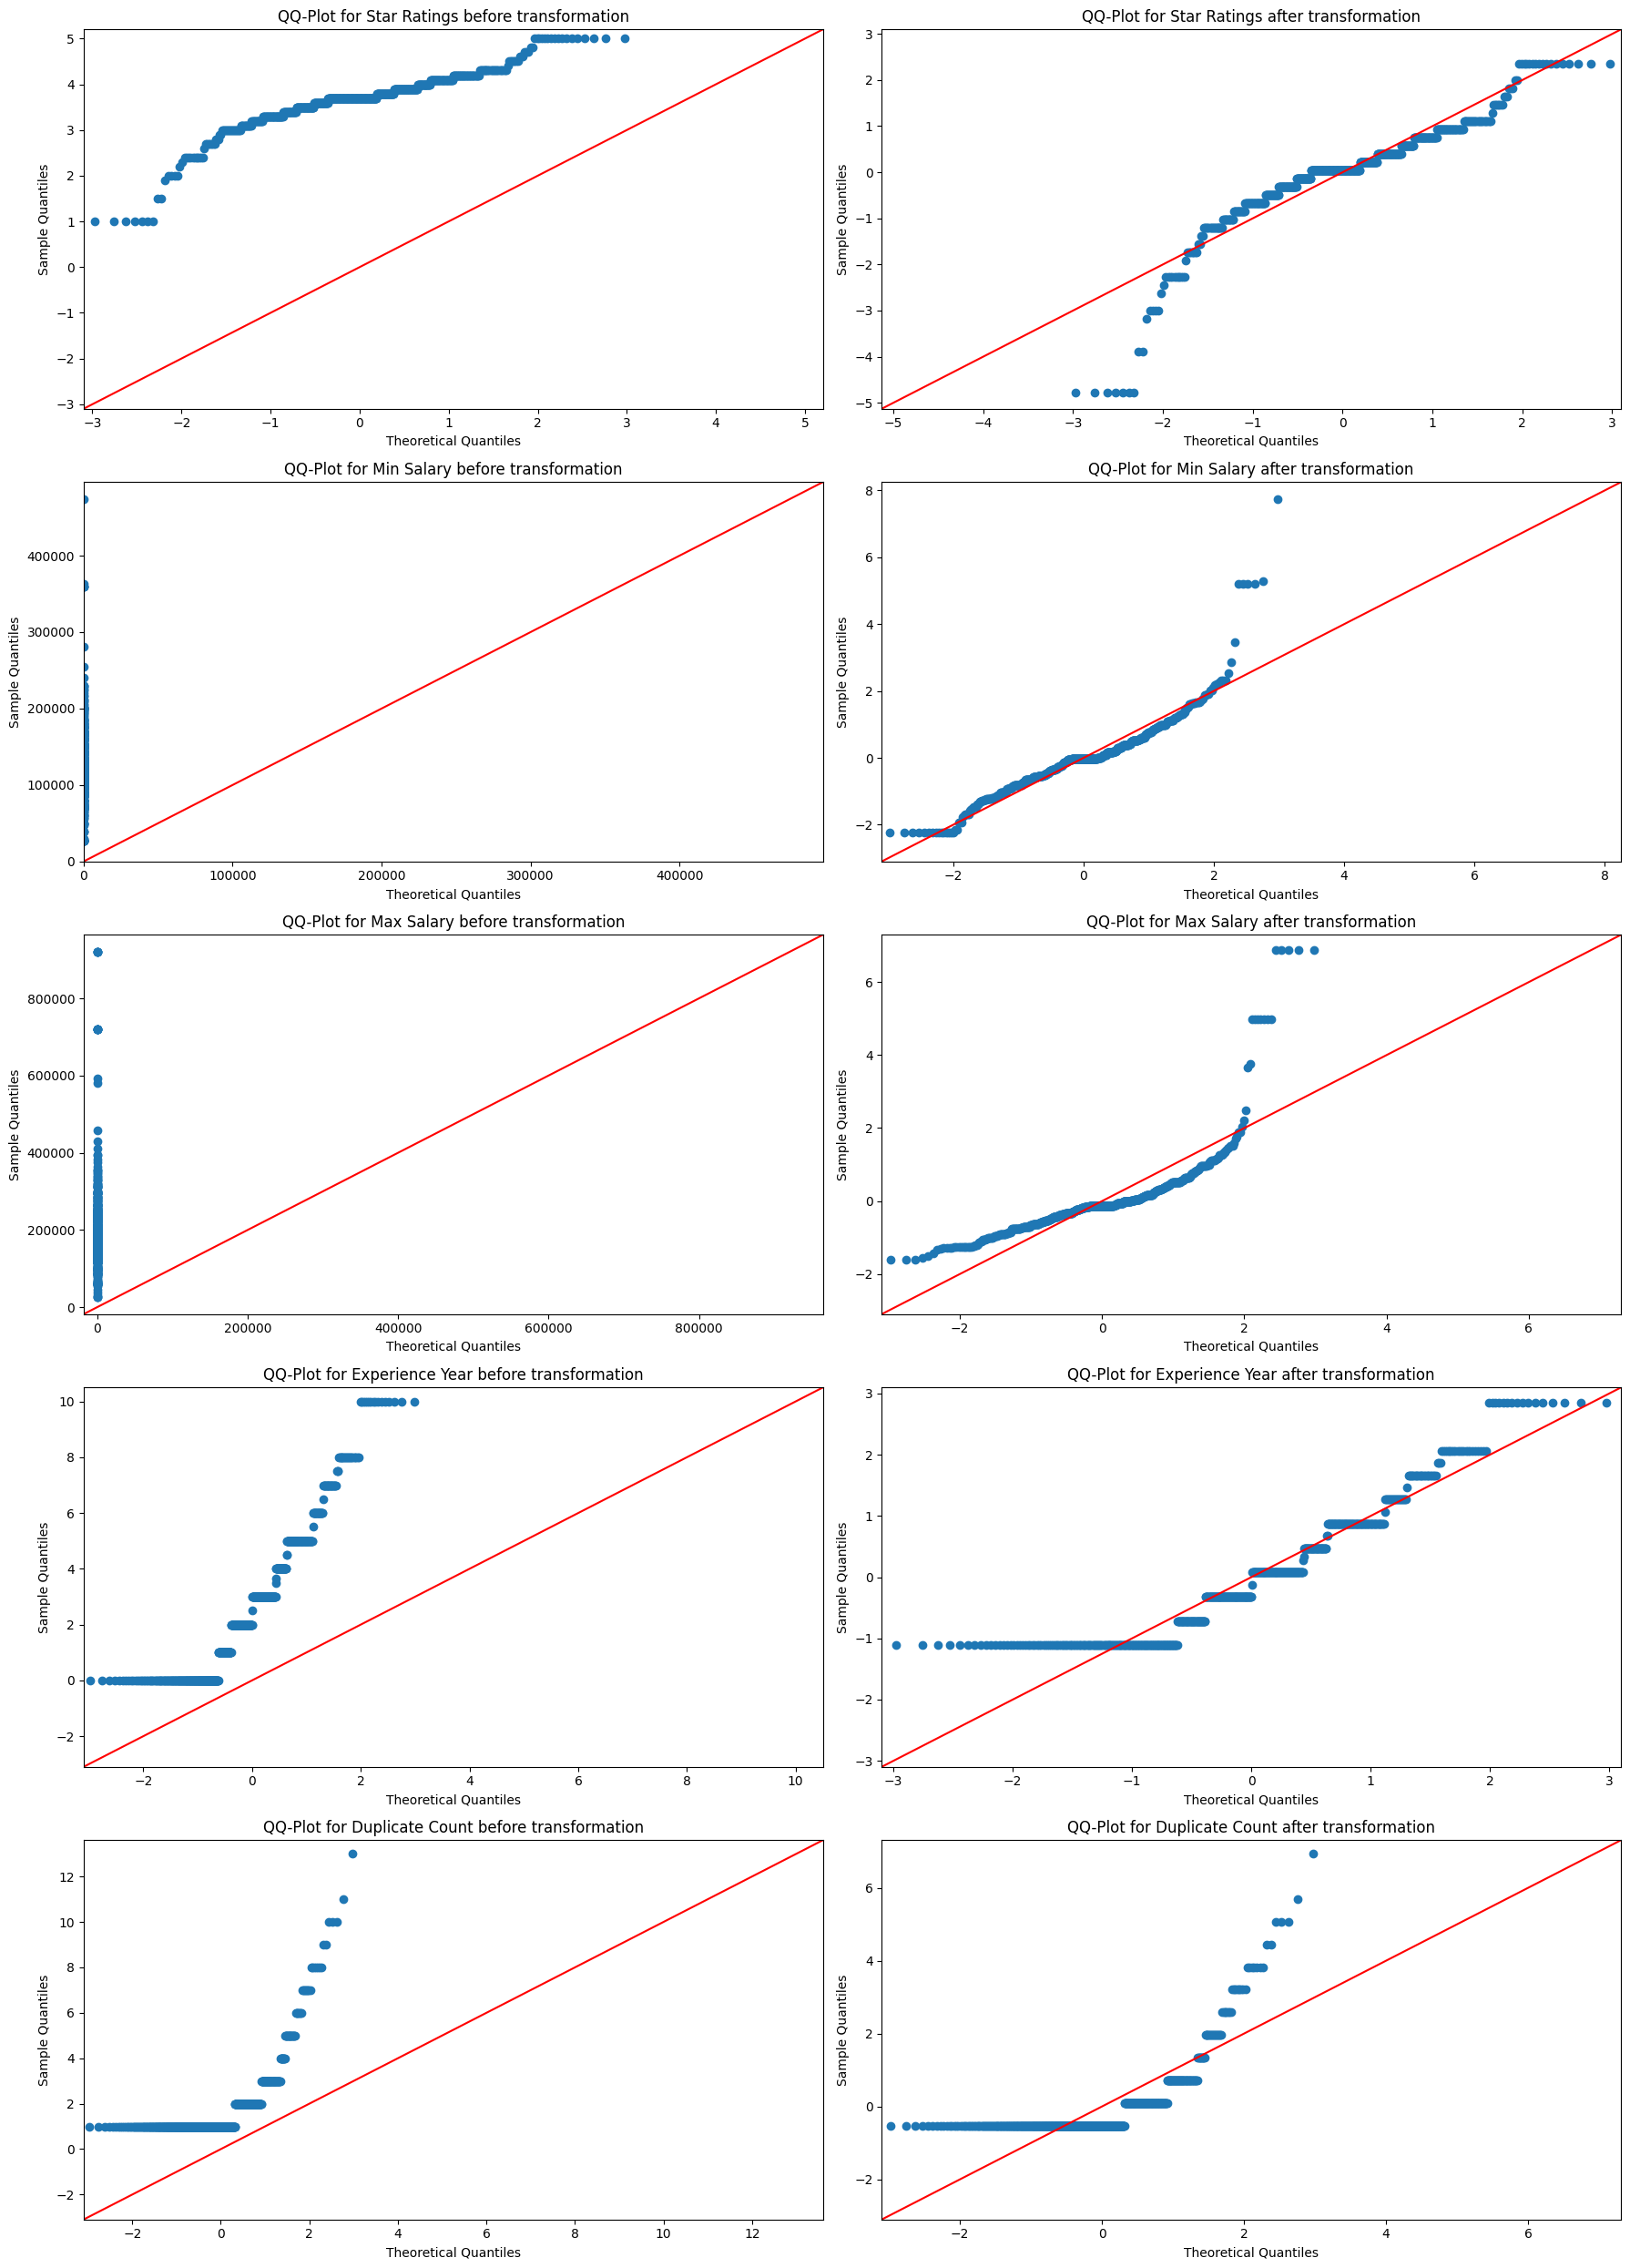

In [278]:
#QQ plot
fig, ax = plt.subplots(5,2,figsize=(18,25))

sm.qqplot(df["star"], line="45", ax=ax[0,0])
ax[0,0].set_title("QQ-Plot for Star Ratings before transformation")
sm.qqplot(df["min salary"], line="45", ax=ax[1,0])
ax[1,0].set_title("QQ-Plot for Min Salary before transformation")
sm.qqplot(df["max salary"], line="45", ax=ax[2,0])
ax[2,0].set_title("QQ-Plot for Max Salary before transformation")
sm.qqplot(df["experience_year"], line="45", ax=ax[3,0])
ax[3,0].set_title("QQ-Plot for Experience Year before transformation")
sm.qqplot(df["duplicate count"], line="45", ax=ax[4,0])
ax[4,0].set_title("QQ-Plot for Duplicate Count before transformation")


sm.qqplot(df["trans star"], line="45", ax=ax[0,1])
ax[0,1].set_title("QQ-Plot for Star Ratings after transformation")
sm.qqplot(df["trans min salary"], line="45", ax=ax[1,1])
ax[1,1].set_title("QQ-Plot for Min Salary after transformation")
sm.qqplot(df["trans max salary"], line="45", ax=ax[2,1])
ax[2,1].set_title("QQ-Plot for Max Salary after transformation")
sm.qqplot(df["trans experience_year"], line="45", ax=ax[3,1])
ax[3,1].set_title("QQ-Plot for Experience Year after transformation")
sm.qqplot(df["trans duplicate count"], line="45", ax=ax[4,1])
ax[4,1].set_title("QQ-Plot for Duplicate Count after transformation")

plt.tight_layout()
plt.show()

# I do not remove outliers at this stage because they are real data. I'll try using this data for ML model.
# If they negatively affect the performance, I'll delete them

In [279]:
df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177


## Data transformation for modeling (categorical columns)

In [280]:
# work style
df["work_style_split"] = df["work_style"].str.split(',')
df_encoded_work_style = df["work_style_split"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()
# df_encoded_work_style = df_encoded_work_style.columns.str.replace(" ", "")

print(df_encoded_work_style.columns)

# benefit (count)
# df["benefit_count"] = df["benefit"].str.split(",").apply(len)
df["benefit_count"] = df["benefit"].apply(lambda x: len(x.split(",")) if x else 0)

# other skill (count)
# df["other_skill_count"] = df["other skill"].str.split(",").apply(len)
df["other_skill_count"] = df["other skill"].apply(lambda x: len(x.split(",")) if x else 0)

# education (dummy encoding)
df["education_split"] = df["education"].str.split(',')
df_encoded_education = df["education_split"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()
df_encoded_education = df_encoded_education.replace(" ", "")

# programming (dummy encoding)
df["programming_language_split"] = df["programming_language"].str.split(',')
df_encoded_programming_language = df["programming_language_split"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()
df_encoded_programming_language = df_encoded_programming_language.replace(" ", "")

# programming (count)
# df["programming_language_count"] = df["programming_language"].str.split(",").apply(len)
df["programming_language_count"] = df["programming_language"].apply(lambda x: len(x.split(",")) if x else 0)

# # experience year (dummy encoding)
# df["experience_year_split"] = df["experience_year"].str.split(',')
# df_encoded_experience_year = df["experience_year_split"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum()

# level (label encoding)
level_map = {"Entry level": 0, "Mid-level": 1, "Senior level": 2}
df["level_encoded"] = df["level"].map(level_map)

# remove unnecessary columns
df = df.drop(columns=["education_split", "programming_language_split"], axis=1)

Index(['Contract', 'Freelance', 'Full-time', 'Internship', 'Part-time',
       'Permanent', 'Temp-to-hire', 'Temporary'],
      dtype='object')


In [281]:
# remove overlapping columns
df_encoded_work_style = df_encoded_work_style.loc[:, ~df_encoded_work_style.columns.isin(df.columns)]
df_encoded_education = df_encoded_education.loc[:, ~df_encoded_education.columns.isin(df.columns)]
df_encoded_programming_language = df_encoded_programming_language.loc[:, ~df_encoded_programming_language.columns.isin(df.columns)]

# concat everything
df_model = pd.concat([df, df_encoded_work_style, df_encoded_education, df_encoded_programming_language], axis=1)

# delete duplicated columns
df_model = df_model.loc[:,~df_model.columns.duplicated()]

In [282]:
print(df_encoded_work_style)

df_encoded_work_style

     Contract  Freelance  Full-time  Internship  Part-time  Permanent  \
0           1          0          1           0          0          0   
1           0          0          0           0          0          0   
2           0          1          0           0          0          0   
3           1          0          1           0          0          0   
4           0          0          1           0          0          0   
..        ...        ...        ...         ...        ...        ...   
684         0          0          1           0          0          0   
685         0          0          1           0          0          0   
686         0          0          1           0          0          0   
687         0          0          1           0          0          0   
688         0          0          1           0          0          0   

     Temp-to-hire  Temporary  
0               0          0  
1               0          0  
2               0          0  

,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary
0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
684,0,0,1,0,0,0,0,0
685,0,0,1,0,0,0,0,0
686,0,0,1,0,0,0,0,0
687,0,0,1,0,0,0,0,0


In [283]:
pd.set_option('display.max_columns', None)
df_model.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"[Full-time, Contract]",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,[Freelance],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"[Full-time, Contract]",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,[Full-time],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [284]:
# If there is only 0 in a column, remove the column
df_model = df_model.loc[:, (df_model != 0).any(axis=0)]

## Export

In [285]:
df_model.to_csv("SImplyHired_cleaned_data_updated.csv", index=False)
df_model.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"[Full-time, Contract]",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,[Freelance],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"[Full-time, Contract]",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,[Full-time],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
